# Relationship Analysis for different variables

In [112]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils.class_weight import compute_class_weight
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

print("Seaborn version =", sb.__version__)
print("matplotlib version =", matplotlib.__version__)
print("pyplot alias =", plt.__name__)

Seaborn version = 0.13.2
matplotlib version = 3.9.2
pyplot alias = matplotlib.pyplot


---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [113]:
ctgdata = pd.read_csv('ctg_cleaned_output.csv')
ctgdata.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [114]:
print("Data type : ", type(ctgdata))
print("Data dims : ", ctgdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2128, 29)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [115]:
print(ctgdata.dtypes)

FileName     object
Date         object
SegFile      object
b           float64
e           float64
LBE         float64
LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
DR          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
NSP         float64
dtype: object


---

### Baseline Heart Rate VS AC,FM,UC,DL,DS,DP,ASTV,ALTV

Next, we will analyze two variables from the dataset, **HP** vs **Attack**.  
Extract the two variables and their associated data as a Pandas `DataFrame`.

In [116]:
BaselineHeartRate = pd.DataFrame(ctgdata['LB'])
Accelerations = pd.DataFrame(ctgdata['AC'])

---

### Bi-Variate Statistics

We can of course check the uni-variate Summary Statistics for each variable.

In [117]:
# Summary Statistics for HP
BaselineHeartRate.describe()

,LB
count,2126.000000
mean,133.303857
std,9.840844
min,106.000000
25%,126.000000
50%,133.000000
75%,140.000000
max,160.000000


In [118]:
# Summary Statistics for Attack
Accelerations.describe()

,AC
count,2126.000000
mean,2.722484
std,3.560850
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,26.000000


And visualize the uni-variate Distributions of each variable independently.

<Axes: >

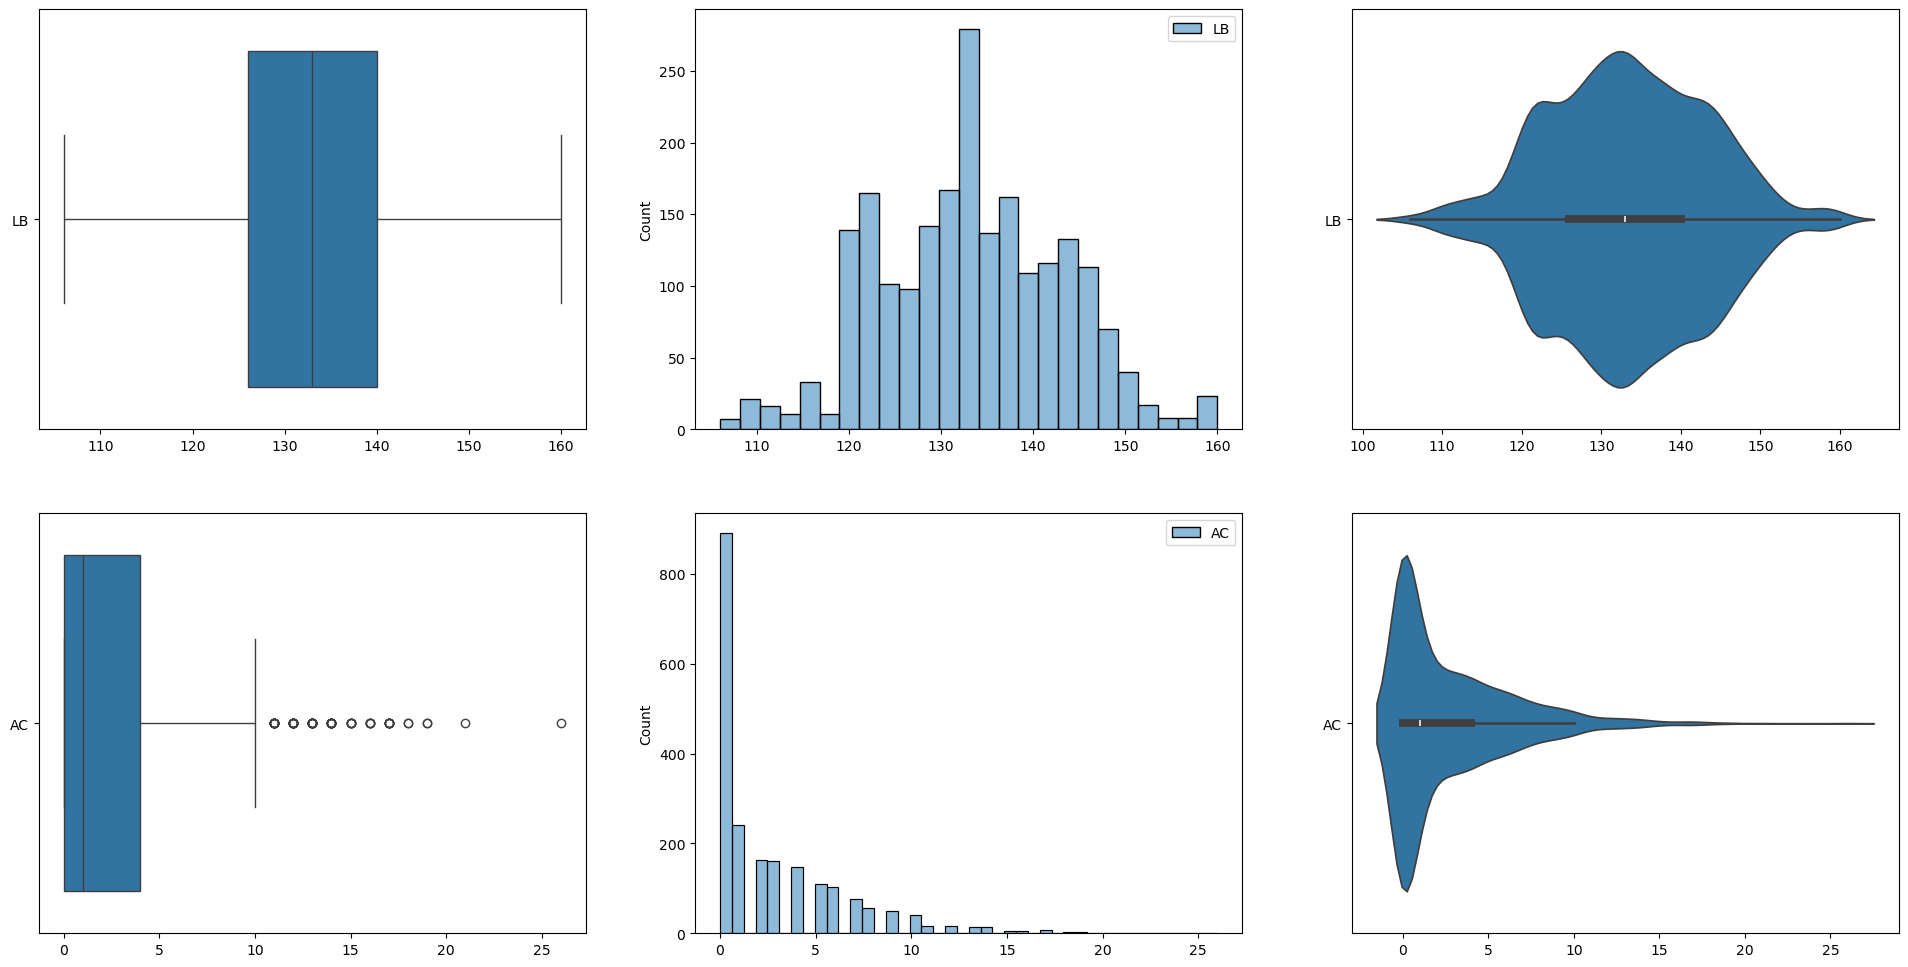

In [119]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = BaselineHeartRate, orient = "h", ax = axes[0,0])
sb.histplot(data = BaselineHeartRate, ax = axes[0,1])
sb.violinplot(data = BaselineHeartRate, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = Accelerations, orient = "h", ax = axes[1,0])
sb.histplot(data = Accelerations, ax = axes[1,1])
sb.violinplot(data = Accelerations, orient = "h", ax = axes[1,2])

However, it will be more interesting to visualize them together in a `jointplot`.

In [120]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([Accelerations, BaselineHeartRate], axis = 1).reindex(Accelerations.index)
jointDF

,AC,LB
0,0.0,120.0
1,4.0,132.0
2,2.0,133.0
3,2.0,134.0
4,4.0,132.0
...,...,...
2123,1.0,140.0
2124,1.0,140.0
2125,1.0,142.0
2126,NaN,NaN


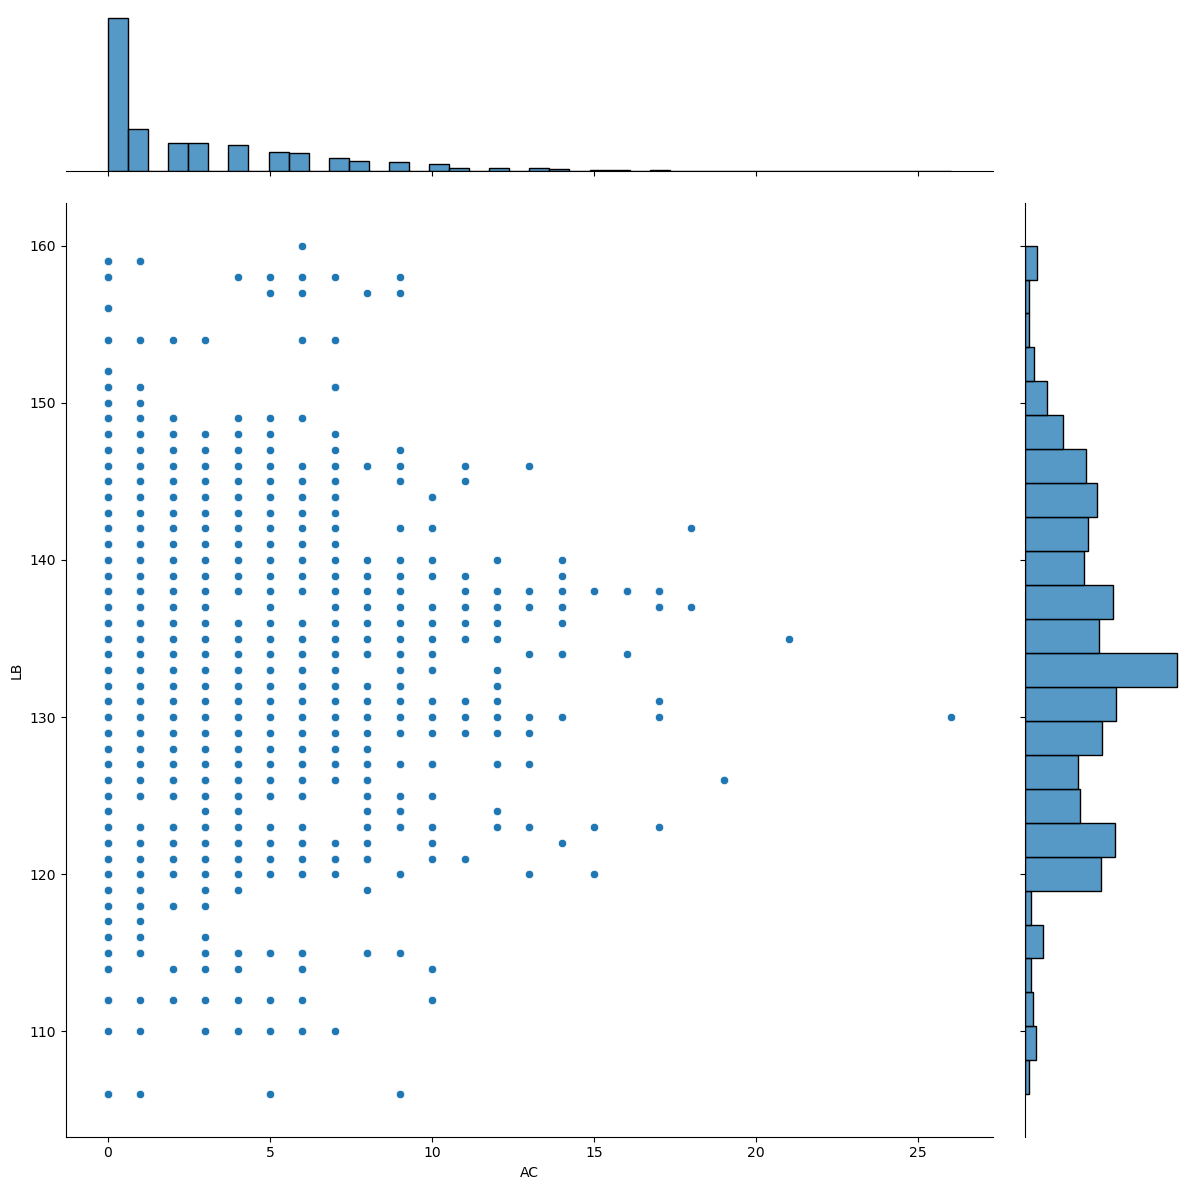

In [121]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "AC", y = "LB", height = 12)

As it tells us something about the **Correlation** between the two variables.

In [122]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,AC,LB
AC,1.000000,-0.077967
LB,-0.077967,1.000000


One may visualize the correlation matrix as a `heatmap` to gain a better insight.

<Axes: >

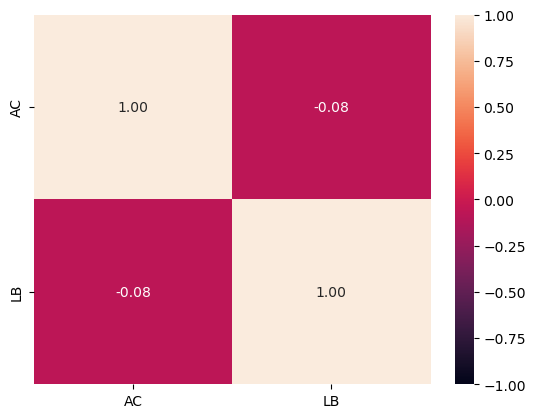

In [123]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

---

### Multi-Variate Statistics

Similarly, we may analyze all numeric values in the original dataset.

In [124]:
# Extract only the numeric data variables
numDF = pd.DataFrame(ctgdata[["LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "ALTV"]])

# Summary Statistics for all Variables
numDF.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,ALTV
count,2126.000000,2126.000000,2127.000000,2127.000000,2128.000000,2128.000000,2128.000000,2127.000000,2127.000000
mean,133.303857,2.722484,7.503056,3.669017,1.576128,0.003759,0.127820,47.008933,9.884814
std,9.840844,3.560850,39.030452,2.877148,2.517794,0.061213,0.471687,17.210648,18.476534
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,126.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000,0.000000
50%,133.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,49.000000,0.000000
75%,140.000000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,61.000000,11.000000
max,160.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,87.000000,91.000000


<Axes: >

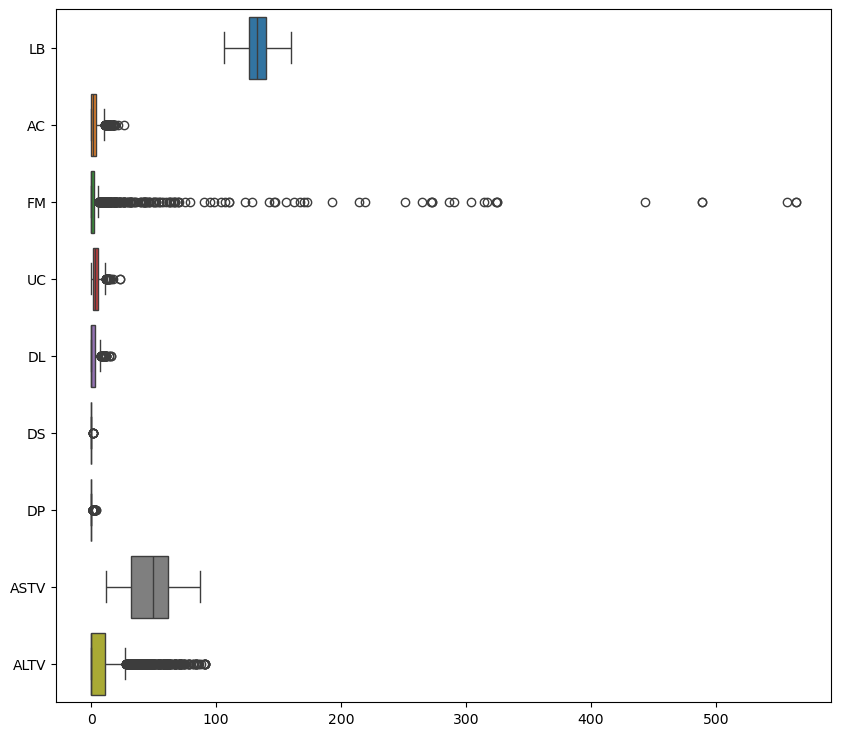

In [125]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(10, 9))
sb.boxplot(data = numDF, orient = "h")

IndexError: index 2 is out of bounds for axis 0 with size 2

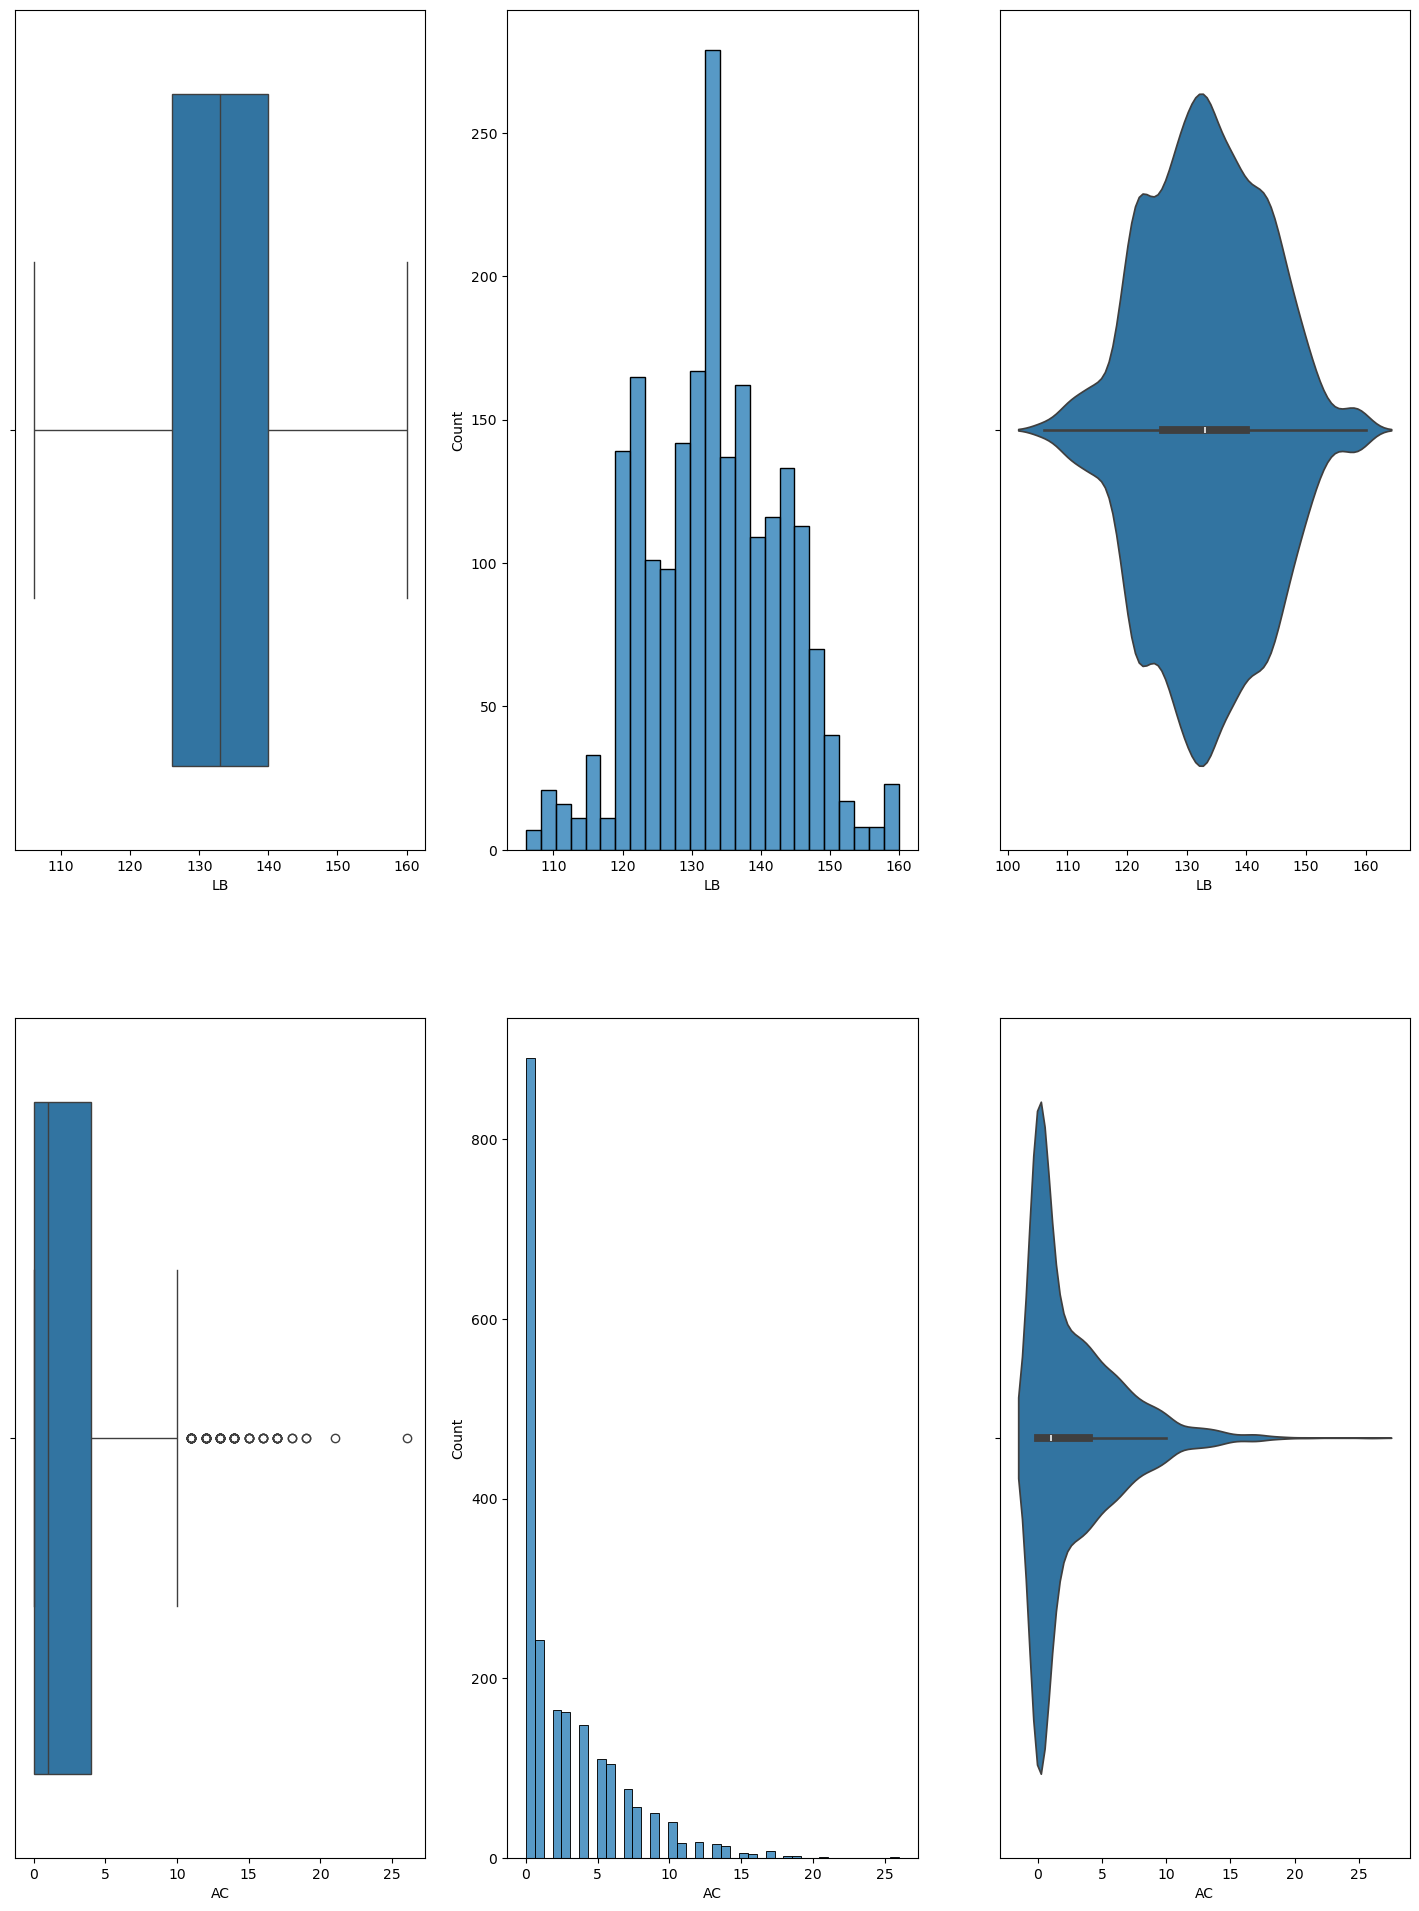

In [126]:
# Draw the distributions of all variables
f, axes = plt.subplots(2, 3, figsize=(18, 24))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
# Calculate the complete  correlation matrix
numDF.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,ALTV
LB,1.000000,-0.077967,-0.033305,-0.127722,-0.155908,-0.053518,-0.117133,0.305570,0.285630
AC,-0.077967,1.000000,0.053956,0.212100,-0.011350,-0.039341,-0.110317,-0.197985,-0.345162
FM,-0.033305,0.053956,1.000000,0.010623,0.110411,0.099984,0.247217,-0.095019,-0.038904
UC,-0.127722,0.212100,0.010623,1.000000,0.351366,0.068483,0.174308,-0.071354,-0.229877
DL,-0.155908,-0.011350,0.110411,0.351366,1.000000,0.156767,0.309295,-0.030443,-0.251200
DS,-0.053518,-0.039341,0.099984,0.068483,0.156767,1.000000,0.081048,0.049515,0.004957
DP,-0.117133,-0.110317,0.247217,0.174308,0.309295,0.081048,1.000000,0.061727,-0.120312
ASTV,0.305570,-0.197985,-0.095019,-0.071354,-0.030443,0.049515,0.061727,1.000000,0.461544
ALTV,0.285630,-0.345162,-0.038904,-0.229877,-0.251200,0.004957,-0.120312,0.461544,1.000000


<Axes: >

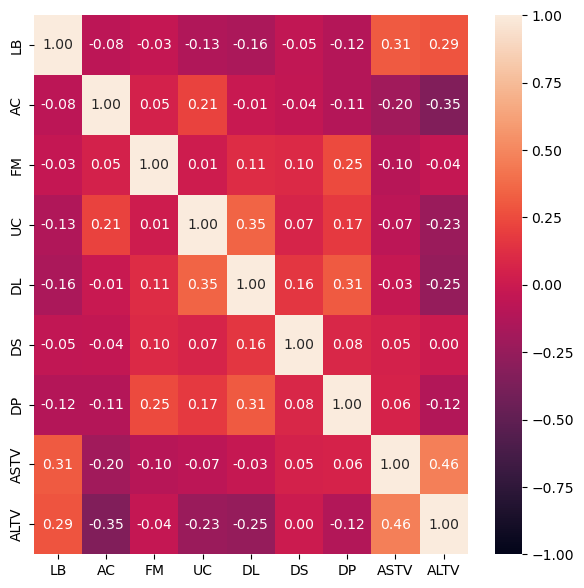

In [128]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(7, 7))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

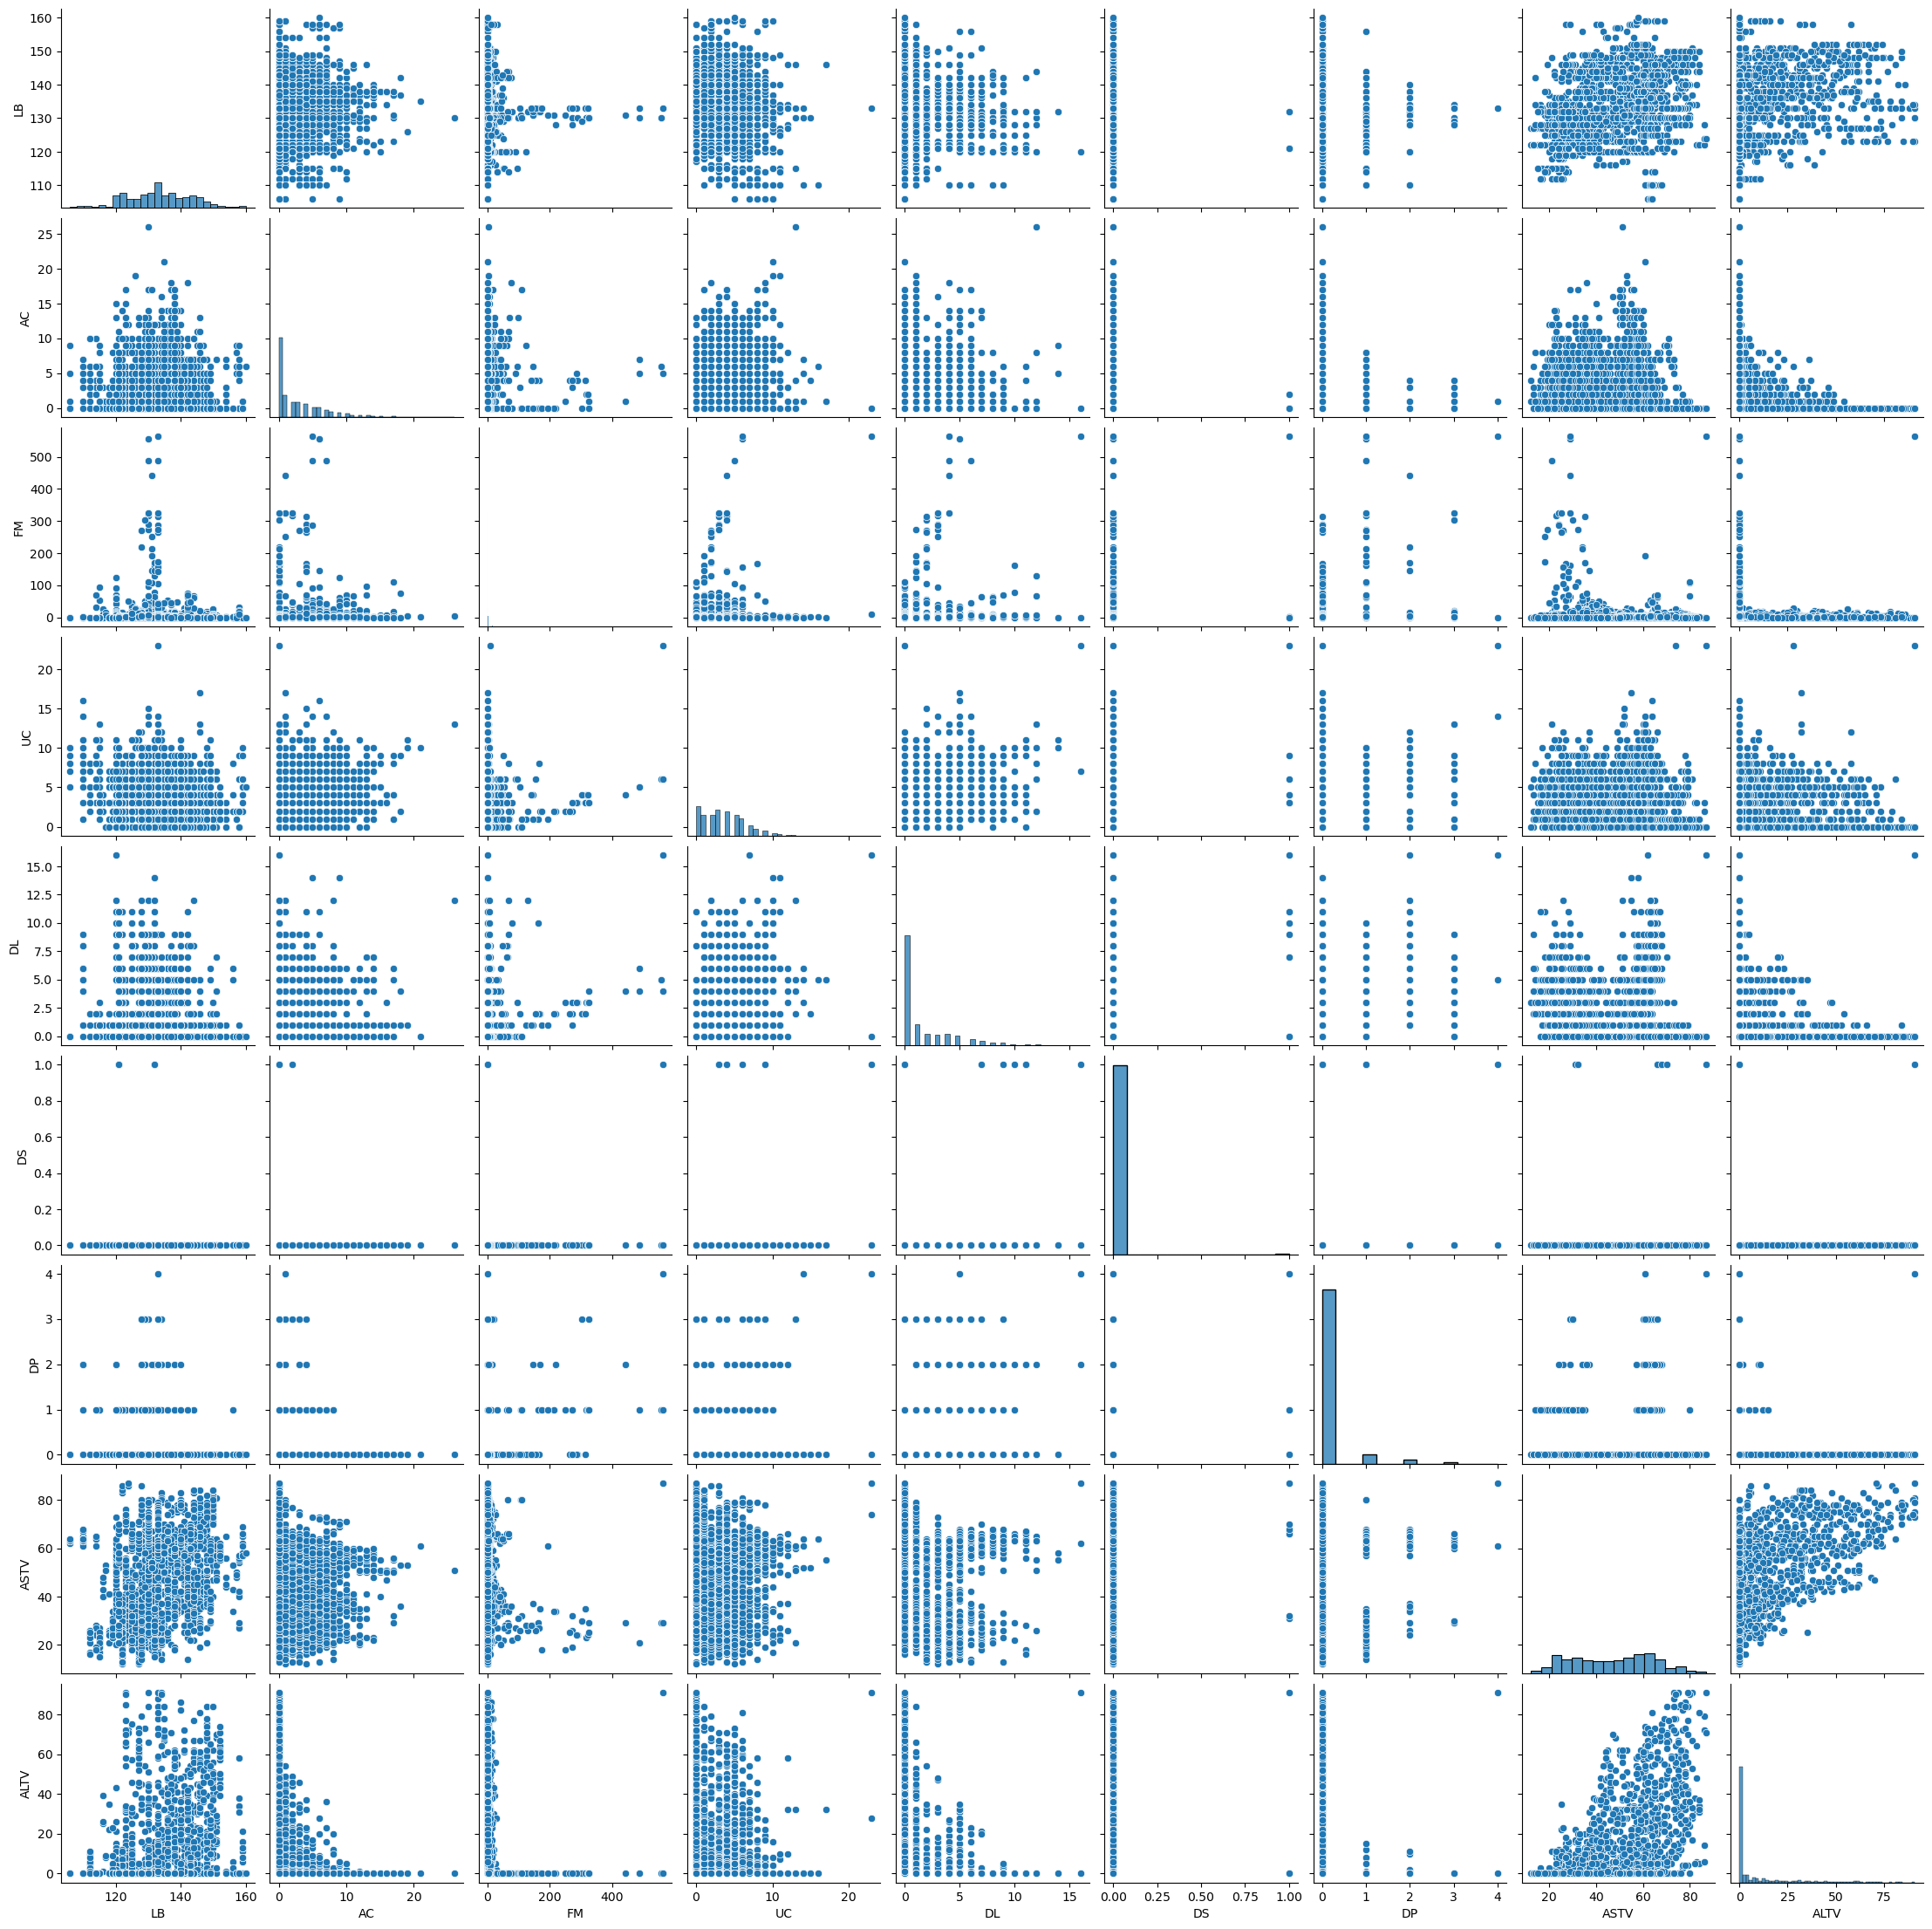

In [ ]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

In [ ]:
clean_df = pd.read_csv("ctg_cleaned_output.csv")
target_col = "NSP"
stats_cols = [col for col in ['AC', 'DL'] if col in clean_df.columns]
group_summary = clean_df.groupby(target_col)[stats_cols].agg(['median', 'mean']).round(2)
group_summary

AC           DL      
    median  mean median  mean
NSP                          
1.0    2.0  3.42    0.0  1.61
2.0    0.0  0.21    0.0  0.40
3.0    0.0  0.33    2.0  3.15

In [ ]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
b,2126.0,878.439793,894.084748,0.0,55.0,538.0,1521.00,3296.0
e,2126.0,1702.877234,930.919143,287.0,1009.0,1241.0,2434.75,3599.0
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.00,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.00,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.00,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.00,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.70,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.00,91.0


In [ ]:
if {'LB', 'ASTV'}.issubset(clean_df.columns):
    baseline_bins = pd.cut(clean_df['LB'], bins=[0, 110, 160, np.inf],
                          labels=['Bradycardic', 'Normal baseline', 'Tachycardic'])
    variability_alert = pd.cut(clean_df['ASTV'], bins=[0, 10, 25, np.inf],
                               labels=['<10% (worrisome)', '10-25% (borderline)', '>25% (reassuring)'])
    baseline_ct = pd.crosstab(baseline_bins, clean_df[target_col])
    variability_ct = pd.crosstab(variability_alert, clean_df[target_col])
    display(baseline_ct)
    display(variability_ct)
else:
    print('Baseline or ASTV columns missing from clean_df.')

NSP,1.0,2.0,3.0
LB,,,
Bradycardic,22,0,6
Normal baseline,1633,295,170


NSP,1.0,2.0,3.0
ASTV,,,
10-25% (borderline),294,5,2
>25% (reassuring),1361,290,174


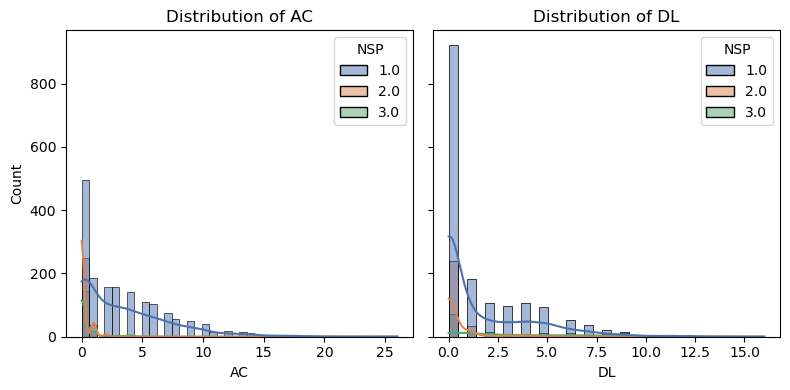

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
for ax, feature in zip(axes, ['AC', 'DL']):   # <-- columns that exist
    sb.histplot(data=clean_df, x=feature, hue=target_col, kde=True,
                 common_norm=False, ax=ax, palette='deep')
    ax.set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


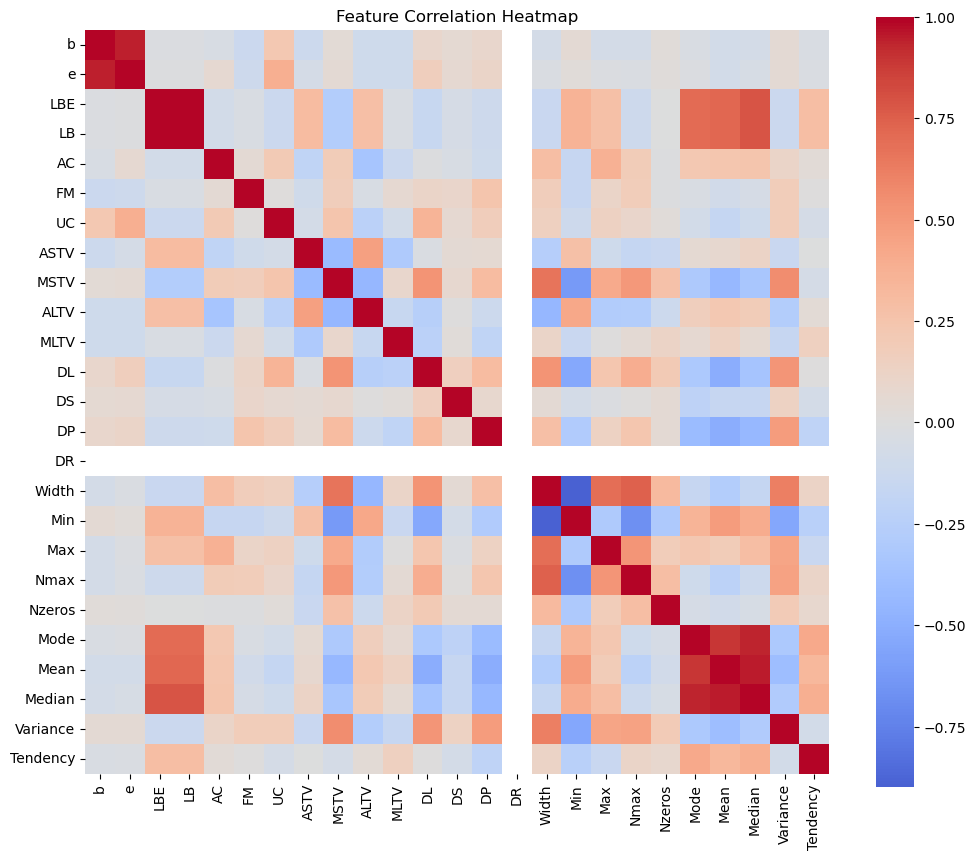

LBE    LB        1.000000
Mean   Median    0.948251
b      e         0.944912
Mode   Median    0.933399
Width  Min       0.898519
Mode   Mean      0.893412
LB     Median    0.789246
LBE    Median    0.789246
Width  Nmax      0.747071
LBE    Mean      0.723121
dtype: float64

In [ ]:
corr_features = clean_df.select_dtypes(include=[np.number]).drop(columns=[target_col])
corr_matrix = corr_features.corr(method='pearson')
plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

corr_pairs = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_pairs.stack().sort_values(ascending=False).head(10)

In [ ]:
corr_features = clean_df.select_dtypes(include=[np.number]).drop(columns=[target_col])

# filter out columns with zero or near-zero variance
non_constant_cols = corr_features.columns[corr_features.nunique() > 1]
corr_features = corr_features[non_constant_cols]

anova_results = []
for feature in corr_features.columns:
    groups = [vals.dropna().values for _, vals in clean_df.groupby(target_col)[feature]]
    if len([g for g in groups if len(g) > 0]) < 2:
        continue
    try:
        h_stat, p_value = stats.kruskal(*groups)
        anova_results.append((feature, h_stat, p_value))
    except ValueError:
        # handles any remaining pathological cases
        continue

anova_df = (pd.DataFrame(anova_results, columns=['Feature', 'H-statistic', 'p-value'])
              .sort_values('H-statistic', ascending=False))
anova_df.head(10)

,Feature,H-statistic,p-value
13,DP,538.483796,1.174166e-117
7,ASTV,533.442304,1.460412e-116
9,ALTV,496.066124,1.908138e-108
4,AC,450.975985,1.179802e-98
8,MSTV,383.308102,5.830466e-84
20,Mean,302.793613,1.775017e-66
21,Median,293.627691,1.736030e-64
19,Mode,268.715626,4.458033e-59
3,LB,254.333673,5.917588e-56
2,LBE,254.333673,5.917588e-56


In [ ]:
# 1. Inspect the target column
clean_df[target_col].value_counts(dropna=False)
clean_df[target_col].unique()

# 2. Drop or impute missing labels
y = clean_df[target_col]

# Option A – drop rows with missing NSP values
mask = y.notna()
y = y.loc[mask]

# Optionally keep the aligned feature matrix if needed later
# X = clean_df.loc[mask, feature_cols]

# 3. Make sure the dtype is consistent (integers)
y = y.astype(int)

# 4. Recompute classes and weights
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced',
                               classes=classes,
                               y=y)

class_weight_dict = dict(zip(classes, weights))
class_weight_dict


{1: 0.4281973816717019, 2: 2.4022598870056497, 3: 4.026515151515151}

In [ ]:
scale_features = [col for col in ['AC', 'ASTV'] if col in clean_df.columns]
scale_sample = clean_df[scale_features].sample(n=5, random_state=0)
scaler = StandardScaler()
scaled_values = scaler.fit_transform(scale_sample)
scaled_df = pd.DataFrame(scaled_values, columns=[f'{col}_scaled' for col in scale_features], index=scale_sample.index)
pd.concat([scale_sample, scaled_df], axis=1)

,AC,ASTV,AC_scaled,ASTV_scaled
563,1.0,30.0,-0.559017,-1.518712
759,0.0,66.0,-1.118034,1.084794
1668,3.0,63.0,0.559017,0.867835
847,1.0,40.0,-0.559017,-0.795516
1784,5.0,56.0,1.677051,0.361598


In [ ]:
mask = clean_df[target_col].notna()
y = clean_df.loc[mask, target_col].astype(int)
numeric_features = clean_df.select_dtypes(include=[np.number]).columns.drop(target_col)
X_numeric = clean_df.loc[mask, numeric_features].fillna(clean_df[numeric_features].median())
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X_numeric)
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_scaled, y)
selected_scores = pd.Series(selector.scores_, index=numeric_features).sort_values(ascending=False)
selected_scores.head(15)


DP          306.222820
ALTV        196.944931
ASTV         58.560184
DS           55.306890
AC           51.983078
Variance     43.870355
DL           33.650952
Min          29.718119
MSTV         21.838616
b            19.254483
Mean         16.849251
LB           16.327064
LBE          16.327064
Width        13.327165
Median       12.680394
dtype: float64

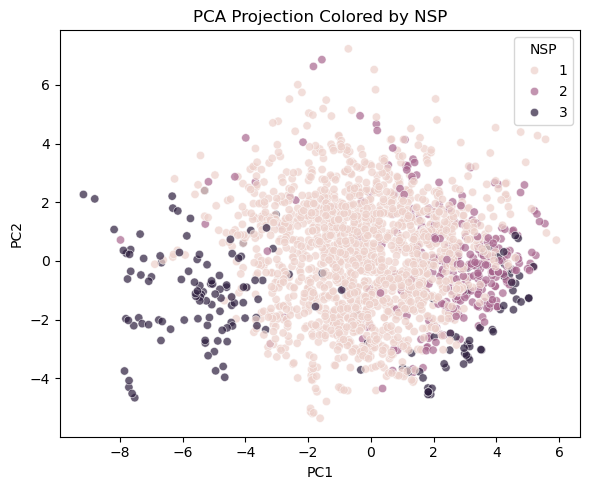

array([0.26703011, 0.15771333])

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_scaled_std = StandardScaler().fit_transform(X_numeric)
pca_components = pca.fit_transform(X_scaled_std)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df[target_col] = y.values

plt.figure(figsize=(6, 5))
sb.scatterplot(data=pca_df, x='PC1', y='PC2', hue=target_col, alpha=0.7)
plt.title('PCA Projection Colored by NSP')
plt.tight_layout()
plt.show()

pca.explained_variance_ratio_

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled_std)
cluster_vs_nsp = pd.crosstab(cluster_labels, y, normalize='index').round(2)
cluster_vs_nsp

NSP,1,2,3
row_0,,,
0,0.63,0.30,0.08
1,0.80,0.02,0.17
2,0.94,0.06,0.01


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

pd.DataFrame({
    'Split': ['Train', 'Test'],
    'Normal (1)': [np.mean(y_train == 1), np.mean(y_test == 1)],
    'Suspect (2)': [np.mean(y_train == 2), np.mean(y_test == 2)],
    'Pathologic (3)': [np.mean(y_train == 3), np.mean(y_test == 3)]
}).rename(columns=lambda c: c if c == 'Split' else f'{c} proportion')

Train shape: (1488, 28)
Test shape: (638, 28)


,Split,Normal (1) proportion,Suspect (2) proportion,Pathologic (3) proportion
0,Train,0.778226,0.139113,0.082661
1,Test,0.778997,0.137931,0.083072
